In [1]:
import numpy as np

In [27]:
x = np.array([1,2,3,4])
y=len(x)
y
z = sum(x[3:])
z

4

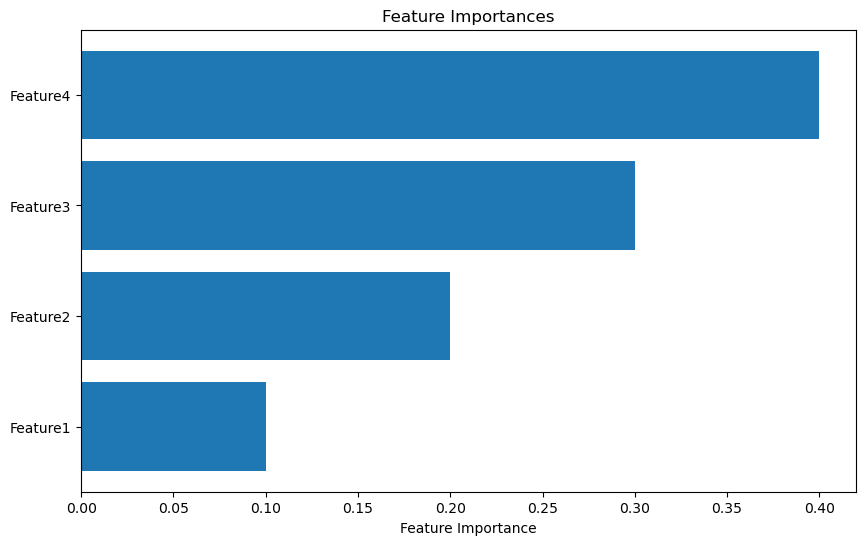

In [31]:
import matplotlib.pyplot as plt

# Example feature importances
feature_importances = [0.1, 0.2, 0.3, 0.4]
# Example feature names
feat_names = ["Feature1", "Feature2", "Feature3", "Feature4"]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feat_names)), feat_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()


In [14]:
import pandas as pd

# Sample pandas Series
series = pd.Series([1, 2, 3, 4, 5,6])

# Reshape the series into a column vector
reshaped_series = series.values.reshape(-1)

print("Original Series:")
print(series)
print("\nReshaped Series:")
print(reshaped_series)


Original Series:
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

Reshaped Series:
[1 2 3 4 5 6]


In [17]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

# Sample DataFrame
data = {
    'ordinal_categorical': [1, 2, None, 3],
    'non_ordinal_categorical': ['A', 'B', None, 'C'],
    'zero_imputed': [1, 0, 0, None],
    'last_review': ['2022-01-01', '2022-02-01', None, '2022-03-01'],
    'name': [
        "This is the first document.",
        "This document is the second document.",
        "And this is the third one.",
        None
    ]
}
df = pd.DataFrame(data)

# Transformers
reshape_to_1d = FunctionTransformer(np.reshape, kw_args={"newshape": -1})
name_tfidf = make_pipeline(
    SimpleImputer(strategy="constant", fill_value=""),
    reshape_to_1d,
    TfidfVectorizer(binary=False, max_features=3, stop_words='english')
)

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal_cat", SimpleImputer(strategy="mean"), ['ordinal_categorical']),
        ("non_ordinal_cat", SimpleImputer(strategy="most_frequent"), ['non_ordinal_categorical']),
        ("impute_zero", SimpleImputer(strategy="constant", fill_value=0), ['zero_imputed']),
        ("transform_date", SimpleImputer(strategy="constant", fill_value='2022-01-01'), ['last_review']),
        ("transform_name", name_tfidf, ['name'])
    ],
    remainder="drop"  # Drop columns that are not transformed
)

# Apply preprocessing
processed_data = preprocessor.fit_transform(df)



TypeError: '<' not supported between instances of 'NoneType' and 'str'